<a href="https://colab.research.google.com/github/hussain0048/Computer-Vision-/blob/main/Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1 - Introduction to Computer Vision**

**Table of Content**
1. How to load an image using the cv2 library?
2. True nature of an image
3. How to convert an image from one colorspace to another?
4. How to compare RGB and BGR channels?
5. How to plot an image by creating an array?
6. How to compare different channels of a single colorspace?

##**1-Load the image and change the colorspace**

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import cv2

When we load the image using the cv2 library, the image is by default loaded in BGR colorspace. For our use, we will convert it into RGB and GRAY colorspace using the following code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the image
img = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img1.jpg')
# Change the image into desired colorspace
grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## **1.2-Plot the image in all the colorspaces using matplotlib subplots**

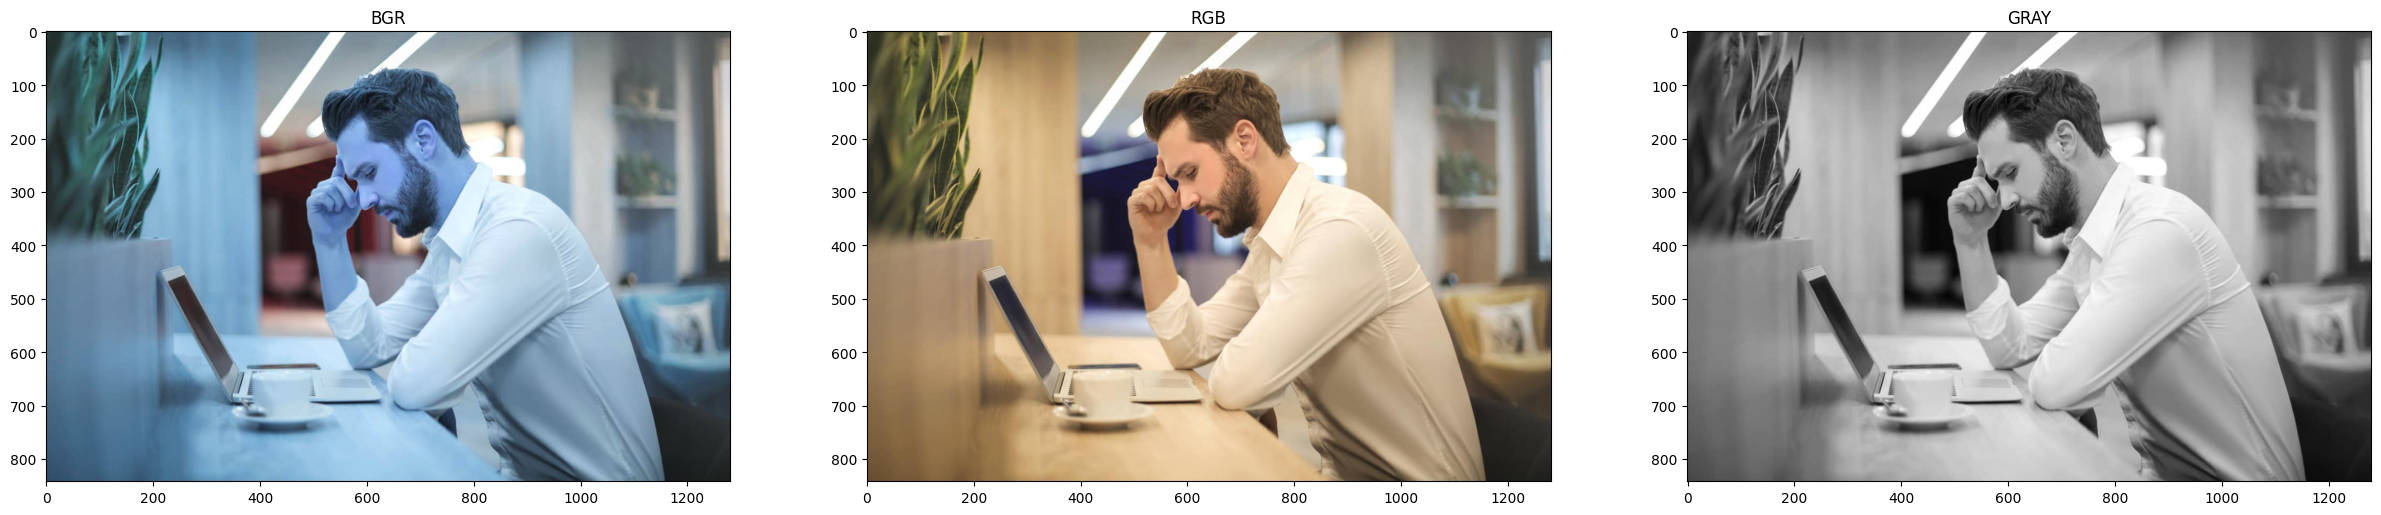

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))
ax1.set_title('BGR')
ax1.imshow(img)
ax2.set_title('RGB')
ax2.imshow(rgb)
ax3.set_title('GRAY')
ax3.imshow(grayscale,cmap='gray')

## **1.3-shape of the image**

In [ ]:
print(img.shape)

(842, 1280, 3)


In [ ]:
print(img[:1,:1])

[[[43 66 62]]]


2160 x 4096 is the dimension of the image I used, where 2160 is the height, and 4096 is the width of the image. The 3 stands for each value of that pixel for a single color. In the latter code, 55 represents the intensity of the blue color, 24 for the green color, and 1 for the red color, since img was by default in BGR colorspace.

## **1-4-know the value of any pixel in grayscale image**

In [ ]:
x,y = 1000,1000
at_1000 = grayscale[x,y]
print(at_1000)

In [ ]:
grayscale[1000,1000,]

## **1-5-Generate various images by creating an array**

Let us generate the alphabet S using a numpy array.



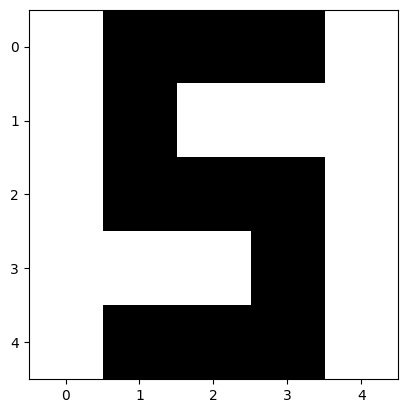

In [ ]:
Letter_S = np.array([[255, 0, 0, 0, 255],
                      [255, 0, 255, 255, 255],
                      [255, 0, 0, 0, 255],
                      [255, 255, 255, 0, 255],
                      [255, 0, 0, 0, 255]])
plt.imshow(Letter_S,cmap='gray')

## **1-6-Plot Each Color Channel from RGB colorspace**

In [ ]:
# Store values of each channel in different array
r = rgb[:,:,0]
g = rgb[:,:,1]
b = rgb[:,:,2]

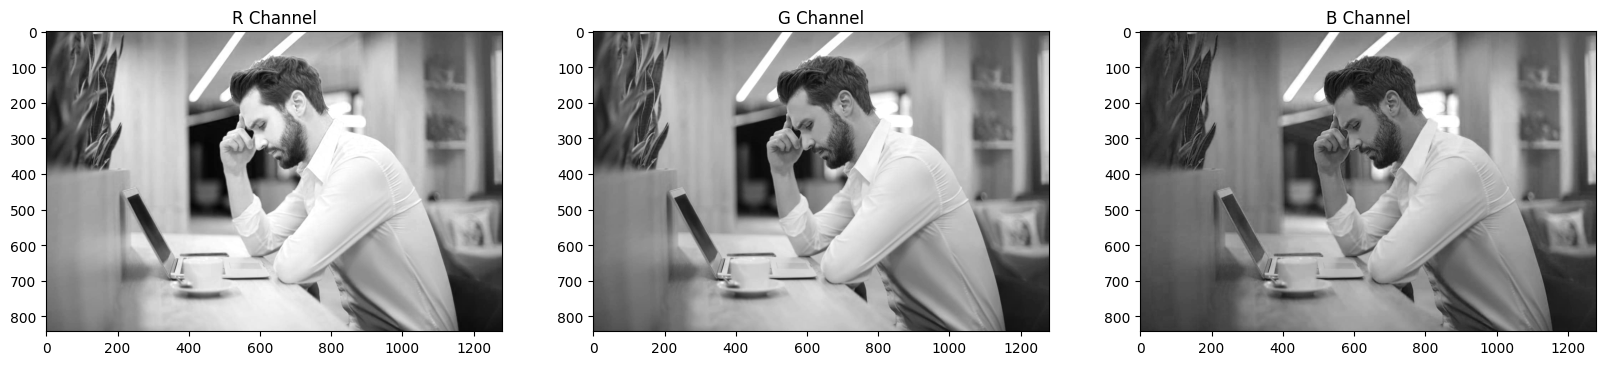

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('R Channel')
ax1.imshow(r, cmap='gray')

ax2.set_title('G Channel')
ax2.imshow(g,cmap='gray')

ax3.set_title('B Channel')
ax3.imshow(b,cmap='gray')

# **Chapter 2:Background Replacement Of An Image**

**Table of Content**

1. Creating a mask for an image
2. Removing the existing background of the image
3. Replacing the background with the image of our choice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img1.jpg')
background = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/background image.jpg')
print('Type:', type(image),
      ' dimensions:', image.shape)

Type: <class 'numpy.ndarray'>  dimensions: (842, 1280, 3)


## **2.1. Function to change the colorspace**



In [ ]:
# Function to convert colorspace from BGR to RGB
def BGR2RGB(BGR_image):
    return cv2.cvtColor(BGR_image,cv2.COLOR_BGR2RGB)

image = BGR2RGB(image)
background = BGR2RGB(background)

## **2.2-. Create a copy and display the image**



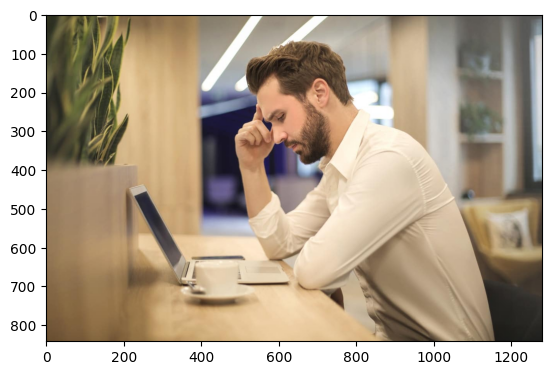

In [ ]:
image_copy = np.copy(image)
plt.imshow(image_copy)

## **2.3. Declare Section Boundaries and create a mask**



In [ ]:
# Next step is to declare the boundaries
lower_range = np.array([0,230,0])
upper_range = np.array([100,255,100])

# Creating a mask
masked = cv2.inRange(image,lower_range,upper_range)
plt.imshow(masked,cmap='Blues_r')

## **2.4-Using the mask on the copy of an original image**

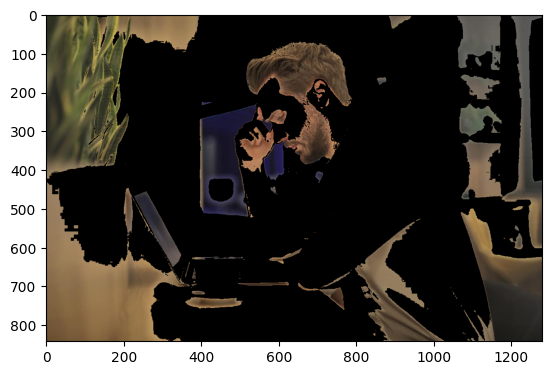

In [ ]:
# storing original image in new variable
masked_image = np.copy(image)
# Step - 1: Region where mask value is not zero i.e not black (mask != 0) is to be turn black in newly stored original image
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image,cmap='gray')

## **2.5-. Using a mask on the background**

In [ ]:
# Crop the image so that it has same dimenstions as of original image
cropped_bg = background[:image.shape[0],:image.shape[1]]
# # Now Lets get to the background we need to be replace it with
# Step 2: Remove the region of car from background image
cropped_bg[mask==0] = [0,0,0]
plt.imshow(cropped_bg)

## 2.6-8. **Final Output**

In [ ]:
final = cropped_bg+masked_image
plt.imshow(final)

## 2**.7. Plotting Function**

In [ ]:
def Plotting(mask,masked_image,cropped_bg,output_image):
    f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(30,10))
    ax1.set_title('Mask')
    ax1.imshow(mask)
    ax2.set_title('Masked_image')
    ax2.imshow(masked_image)
    ax3.set_title('Cropped Background')
    ax3.imshow(cropped_bg)
    ax4.set_title('Output')
    ax4.imshow(output_image)

Plotting(image,masked,cropped_bg,final)

## **2.8-Put it all together**

In [ ]:
# Combining Everything in one function
def BG_replacement(image,background,lower_range,upper_range):
#     Step1 - Creating a mask
    mask = cv2.inRange(image,lower_range,upper_range)
#     Step2 - Using mask on copy of original image
    masked_image = np.copy(image)
    masked_image[mask!=0] = [0,0,0]
#     Step3 - Using mask on background
    cropped_bg = background[:image.shape[0],:image.shape[1]]
    cropped_bg[mask==0] = [0,0,0]
#     Creating output image by adding images obtained in step2 and step
    output_image = masked_bulb + cropped_bg
#     Final Plot
    Plotting(mask,masked_image,cropped_bg,output_image)

In [ ]:
BG_replacement

Chaper 2: Image as function

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

d = cv2.imread('CS6476_resources/CS6476_dolphin.PNG')
b = cv2.imread('CS6476_resources/CS6476_bicycle.PNG')

db = b+d            # Raw addition amplifies the intensity
db2 = (b/2)+(d/2)   # So we divide the intesities
# plt.imshow((db2 * 255).astype(np.uint8))
# Pretty fuzzy eh?

# Blending ( aka Alpha Blending is a weighted addition)
def myblend(imA,imB,alpha):
    rval = (alpha*imA)+((1-alpha)*imB)
    return rval

#x = myblend(b,d,0.999)
x = cv2.addWeighted(b,0.6,d,0.4,0)
print(x.dtype)
plt.imshow(x)

# **Chapter 3:— Filters**


**Table of Content**

1. What are Filters?
2. What is sobel filter?
3. How to create and apply sobel filter?
4. What is the Laplacian filter?
5. How to create and apply the Laplacian filter?

## **3.1-Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## **3.2. Load the images in the format you want**

In [ ]:
image3 = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img3.webp'),cv2.COLOR_BGR2RGB)


## **3.3-Plot the image**

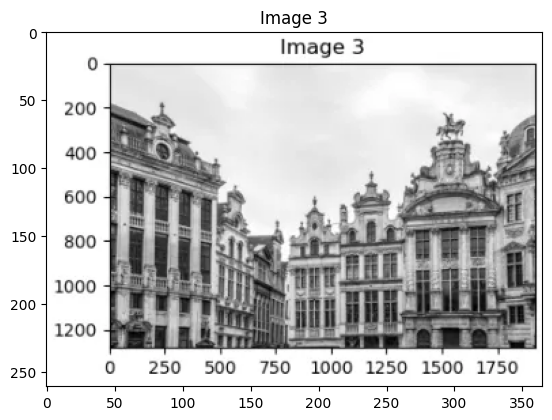

In [ ]:
plt.imshow(image3)
plt.title('Image 3')
plt.show()

## **3.4-Convert our image to grayScale**

In [ ]:
def to_gray(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

## **3.5-Sobel Filter**

**Sobel Filter — Used to detect verticle edges**

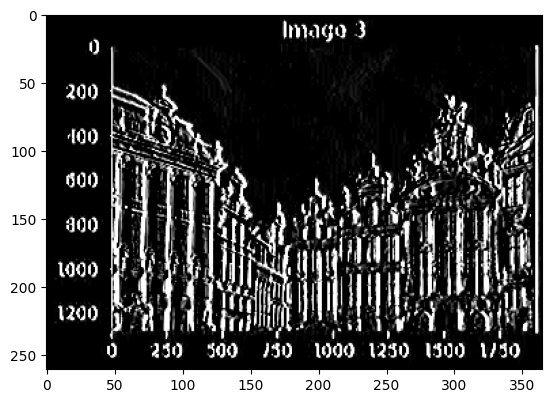

In [ ]:
sobel_x = np.array([[-1,0,1],
                  [-5,0,5],
                  [-1,0,1]])
filtered_x = cv2.filter2D(to_gray(image3),-1,sobel_x)
#represents that 'do not change the format of output image and keep it same as input image'
plt.imshow(filtered_x,cmap='gray')

Let's see how the change in threshold value changes the output

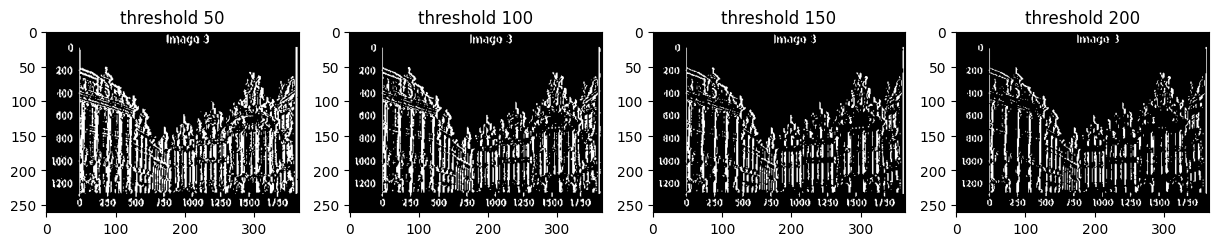

In [ ]:
#  Set a threshold, so that points above threshold will be white/visible
retval, binary_image1 = cv2.threshold(filtered_x,50,255,cv2.THRESH_BINARY)
retval, binary_image2 = cv2.threshold(filtered_x,100,255,cv2.THRESH_BINARY)
retval, binary_image3 = cv2.threshold(filtered_x,150,255,cv2.THRESH_BINARY)
retval, binary_image4 = cv2.threshold(filtered_x,200,255,cv2.THRESH_BINARY)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,8))
ax1.set_title('threshold 50')
ax1.imshow(binary_image1,cmap='gray')
ax2.set_title('threshold 100')
ax2.imshow(binary_image2,cmap='gray')
ax3.set_title('threshold 150')
ax3.imshow(binary_image3,cmap='gray')
ax4.set_title('threshold 200')
ax4.imshow(binary_image4,cmap='gray')

**Sobel Filter — Used to detect horizontal edges**


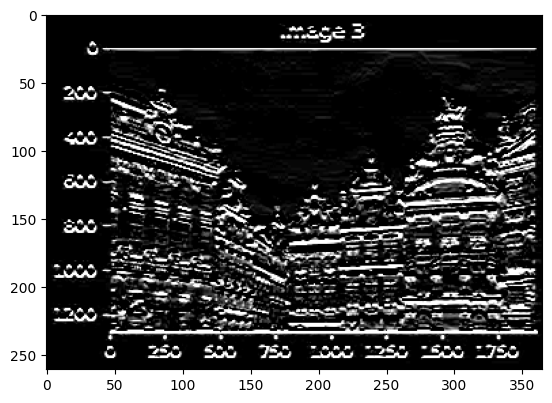

In [ ]:
sobel_y = np.array([[-1,-5,-1],
                   [0,0,0],
                   [1,5,1]])
filtered_y = cv2.filter2D(to_gray(image3),-1,sobel_y)
plt.imshow(filtered_y,cmap='gray')

In [ ]:
#  Set a threshold, so that points above threshold will be white/visible
retval, binary_image1 = cv2.threshold(filtered_y,50,255,cv2.THRESH_BINARY)
retval, binary_image2 = cv2.threshold(filtered_y,100,255,cv2.THRESH_BINARY)
retval, binary_image3 = cv2.threshold(filtered_y,150,255,cv2.THRESH_BINARY)
retval, binary_image4 = cv2.threshold(filtered_y,200,255,cv2.THRESH_BINARY)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,8))
ax1.set_title('threshold 50')
ax1.imshow(binary_image1,cmap='gray')
ax2.set_title('threshold 100')
ax2.imshow(binary_image2,cmap='gray')
ax3.set_title('threshold 150')
ax3.imshow(binary_image3,cmap='gray')
ax4.set_title('threshold 200')
ax4.imshow(binary_image4,cmap='gray')

## **3.6-Laplacian Filter**

In [ ]:
kernel_size = 3
def lap_filter(k):
    laplacian_filter = np.array([[1, 1, 1],
                                 [1, -k, 1],
                                 [1, 1, 1]])
    laplacian_filter = laplacian_filter / np.sum(np.abs(laplacian_filter))
    return laplacian_filter

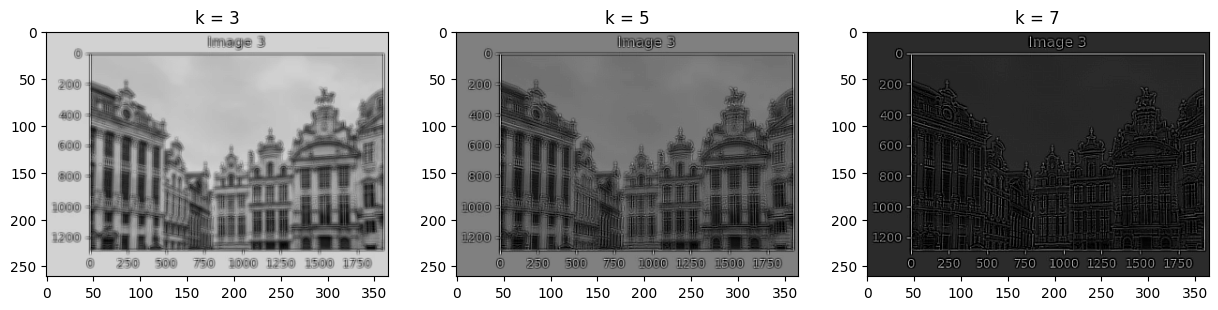

In [ ]:
# Apply Laplacian filter

img = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img3.webp', cv2.IMREAD_GRAYSCALE)

filtered_3 = cv2.filter2D(img, -1, lap_filter(3))
filtered_5 = cv2.filter2D(img, -1, lap_filter(5))
filtered_7 = cv2.filter2D(img, -1, lap_filter(7))

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,8))
ax1.set_title('k = 3')
ax1.imshow(filtered_3,cmap='gray')
ax2.set_title('k = 5')
ax2.imshow(filtered_5,cmap='gray')
ax3.set_title('k = 7')
ax3.imshow(filtered_7,cmap='gray')

# **References**

[1-Computer Vision Tutorial Series M1C1](https://pub.towardsai.net/computer-vision-tutorial-series-m1c1-535c27cd36ca)

[2-Module 1 — Image Representation and Classification](https://medium.com/towards-artificial-intelligence/computer-vision-tutorial-series-m1c2-13628dceab33)

[3-Computer Vision Tutorial Series M1C2](https://pub.towardsai.net/computer-vision-tutorial-series-m1c2-13628dceab33)

[4-Module 2 — Convolutional Filters and Edge Detection](https://pub.towardsai.net/computer-vision-tutorial-series-m2c2-62b8272eb45d)

[5-CS6476-Computer Vision](https://monzersaleh.github.io/GeorgiaTech/CS6476_CV/CS6476_ComputerVision.html)